<center><b><big> CITS5508 LAB SHEET 4</big></b></center>

**Name: Thanh Duy Tang**<br>
**Student Number: 22803018**<br>
**Date created: 26th Apr 2020 <br>
**Last modified: 3rd May 2020

## 1. Setup

Before going to loading data part, we need to make sure that MatplotLib figures inline and prepare a function to save the figures. Moreover, we should use Python 3.0 as well as Scikit-Learn >= 0.20

In [643]:
#Python >= 3.0 is required
import sys
assert sys.version_info >= (3,5)

#Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= '0.20'

#Get the pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Save the figures
import os
LAB2_ROOT_DIR = "."
CHAPTER_ID = "LAB SHEET 4"
IMAGES_PATH = os.path.join(LAB2_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Loading data
First, we need to dowload the zip file from http://archive.ics.uci.edu/ml/datasets/Abalone
and put the file into the same directory of this lab file.

In [644]:
#Load the Pandas libraries with alias "pd"
import os
import pandas as pd
#Read data from "abalone.data"
data_set = pd.read_csv("abalone.data", header = None)
#Change the column name
data_set = data_set.set_axis(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight'
                           , 'Shell weight', 'Rings'], axis = 1, inplace = False)
data_set

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


There are 12 attributes in this dataset including numerical values. There is a column "quality" that describes the quality of the wine. 

In [645]:
#Summary how the dataset distrbitued in the dataset.
data_set.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


At first, the dataset doesn't have missing values. So I turned to prepare dataset step.

In [646]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Data set does not have missing values. So we continue to the next step.

## 3. Preparing data

In [647]:
# One Hot Encoding
data_set = pd.get_dummies(data_set)

# Extract numeric data and target data
target_data = data_set['Rings']
num_data = data_set.drop('Rings', axis = 1)

# List of numeric columns for later use
num_list = list(num_data.columns)

# Convert to numpy arrays
import numpy as np
num_data = np.array(num_data)
target_data = np.array(target_data)

In [648]:
#Summary of first 10 values of data
data_set.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1,0,0


In [649]:
#Split training set into training set and test set following the ratio (85/15)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(num_data, target_data, test_size = 0.15, random_state=42)

When doing Random Forest Regressor, we don't need to scale features.

## 4. Random Forest Regressor with orginal data

In [650]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 30],
    'min_samples_leaf': [15, 20],
    'min_samples_split': [15,20],
    'n_estimators': [10, 50]
}
# Create a based model
rf = RandomForestRegressor(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

At first, to make sure that the dataset is not overfitting, I ran GridSearchCV to find the best hyperparameters for the Regressor.

In [651]:
#Print the best hyperparameters to use for regression
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 15,
 'n_estimators': 50}

Here is the best hyperparameters that I got.

In [652]:
# Building Random Forst Regressor.
rdf_reg = grid_search.best_estimator_

In [653]:
#Fit the train set
rdf_reg.fit(x_train, y_train)
rdf_reg_y_pred = rdf_reg.predict(x_train)

In [654]:
#Fit the test set
rdf_reg_y_pred1 = rdf_reg.predict(x_test)

In [655]:
#Round the predicted values.
import numpy as np
rdf_reg_y_pred = np.round(rdf_reg_y_pred)
rdf_reg_y_pred1 = np.round(rdf_reg_y_pred1)


In [656]:
#Compute MSE of train set and test set
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, rdf_reg_y_pred)
MSE_test = mean_squared_error(y_test, rdf_reg_y_pred1)
print(MSE_train)
print(MSE_test)

3.5980281690140843
4.821371610845295


The MSE of train set was lower than the MSE of test set in this case. These two MSEs of both set not varied much, so I decided to continue to do further with these results.

In [657]:
#Count the number of raw error of last estimator for train set
import numpy as np
import pandas as pd
diff = np.round(y_train - rdf_reg_y_pred)

unique, counts = np.unique(np.array(diff).flatten(), return_counts=True)
counts_diff = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff

,counts
-8.0,1
-7.0,2
-6.0,4
-5.0,12
-4.0,37
-3.0,112
-2.0,384
-1.0,934
0.0,1028
1.0,515


In [658]:
#Change default plot size.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size

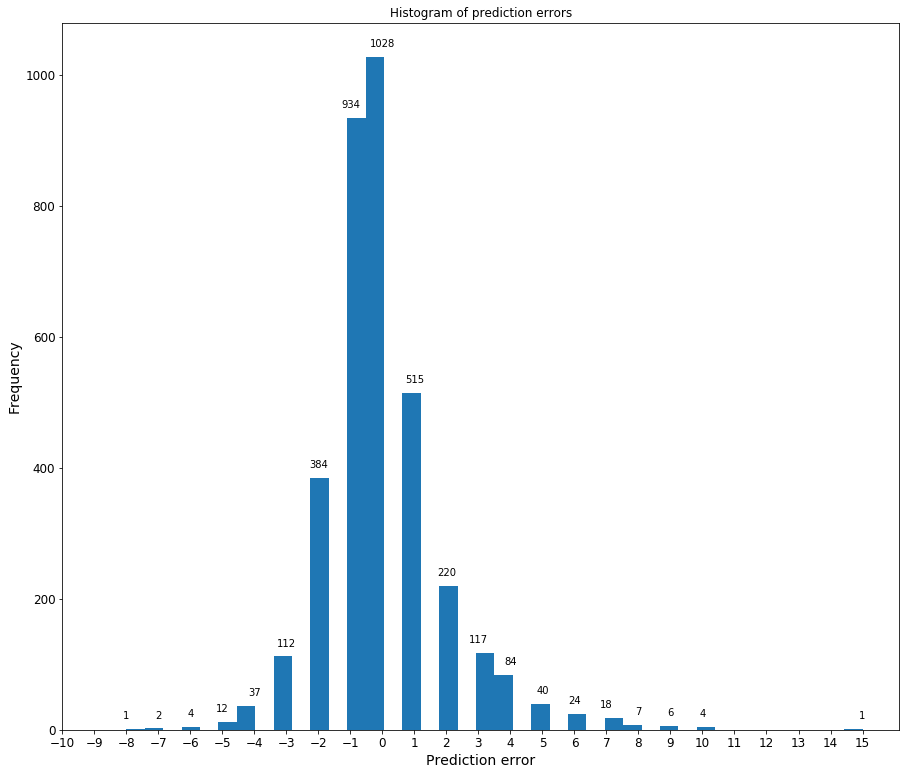

In [659]:
#Plot the raw errors of last estimator for train set
import matplotlib.pyplot as plt
plt.hist(diff, bins = 40)
for x,y in zip(unique,counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-10,16,1))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 1028 times. Additionally, it also overestimates the quality rating by 1 515 times, by 2 220 times, by 3 117 times, by 4 84 times, by 5 40 times, by 6 24 times, by 7 18 times, by 8 7 times, by 9 6 times, by 10 4 times and by 15 1 time. Moreover, it underestimates the quality rating by 1 934 times, by 2 384 times, by 3 112 times, by 4 37 times, by 5 12 times, by 6 4 times, by 7 2 times and by 8 1 time.

In [660]:
#Count the number of raw error of last estimator for test set
import numpy as np
import pandas as pd
diff1 = np.round(y_test - rdf_reg_y_pred1)
unique, counts = np.unique(np.array(diff1).flatten(), return_counts=True)
counts_diff1 = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff1

,counts
-5.0,3
-4.0,7
-3.0,37
-2.0,72
-1.0,162
0.0,153
1.0,94
2.0,35
3.0,22
4.0,14


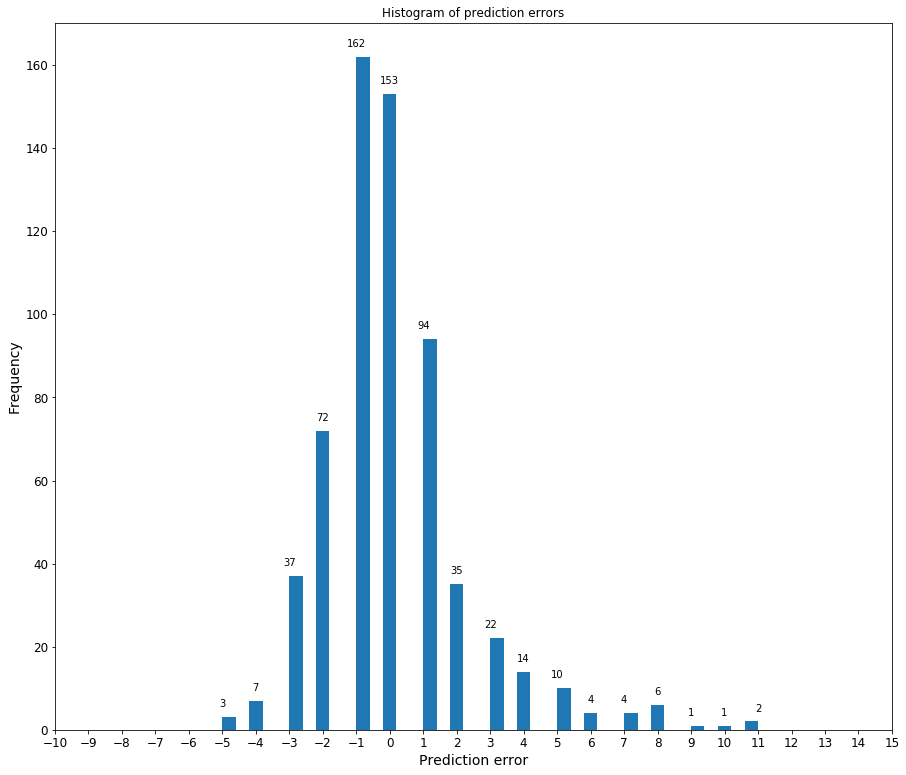

In [661]:
#Plot the raw errors of last estimator for test set
import matplotlib.pyplot as plt
plt.hist(diff1, bins = 40, label = str)
for x,y in zip(unique,counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-10,16,1))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 153 times. Additionally, it also overestimates the quality rating by 1 94 times, by 2 35 times, by 3 22 times, by 4 14 times, by 5 10 times, by 6 4 times, by 7 4 times, by 8 6 times, by 9 1 times, by 10 1 time and  by 11 2 times. Moreover, it underestimates the quality rating by 1 162 times, by 2 72 times, by 3 37 times, by 4 7 times and by 5 3 times.

## 5. Random Forest Regressor with reduced-dimensional data

### Get the importance scores of each feature.

In [662]:
# Get numerical feature importances
importances = list(rdf_reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(num_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Shell weight         Importance: 0.68
Variable: Shucked weight       Importance: 0.16
Variable: Whole weight         Importance: 0.04
Variable: Diameter             Importance: 0.03
Variable: Length               Importance: 0.02
Variable: Height               Importance: 0.02
Variable: Viscera weight       Importance: 0.02
Variable: Sex_I                Importance: 0.02
Variable: Sex_F                Importance: 0.0
Variable: Sex_M                Importance: 0.0


[None, None, None, None, None, None, None, None, None, None]

### Plot importance scores

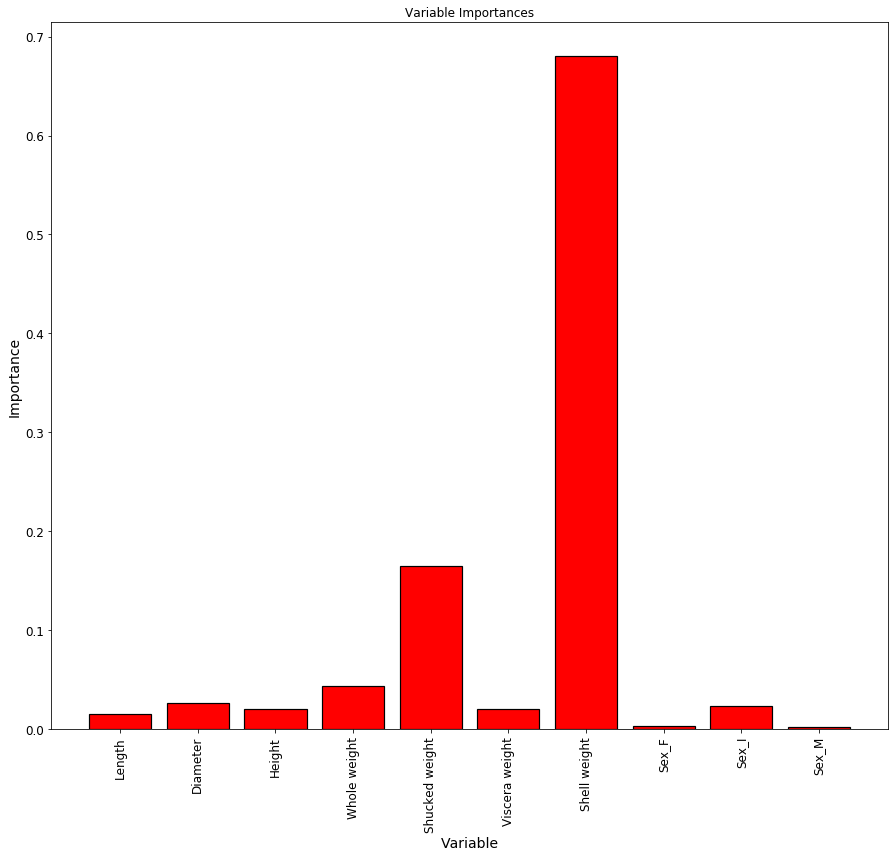

In [663]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, num_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


## Finding the importance features

In [664]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:'s, np.where(cumulative_importances > 0.95)[0][0] + 1)

SyntaxError: invalid syntax (<ipython-input-664-83b3f7f2f10d>, line 3)

In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
important_feature_names

In [ ]:
# Find the columns of the most important features
important_indices = [num_list.index(feature) for feature in important_feature_names]
important_indices

## Run the regressor with importance features only

In [ ]:
# Create training and testing sets with only the important features
x_train_new = x_train[:, important_indices]
x_test_new = x_test[:, important_indices]

In [ ]:
#Building Random Forest Regressor for new train set

rdf_reg.fit(x_train_new, y_train)
rdf_reg_y_pred = rdf_reg.predict(x_train_new)

In [ ]:
#Building Random Forest Regressor for test set

rdf_reg_y_pred1 = rdf_reg.predict(x_test_new)

In [ ]:
#Round the predicted values.
import numpy as np
rdf_reg_y_pred = np.round(rdf_reg_y_pred)
rdf_reg_y_pred1 = np.round(rdf_reg_y_pred1)

In [ ]:
#Compute MSE of train set and test set
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_train, rdf_reg_y_pred)
MSE_train = mean_squared_error(y_test, rdf_reg_y_pred1)
print(MSE_test)
print(MSE_train)

Compared to the original data, the MSEs for both sets in feature reduction section were higher than the original one. However, it could not affect much on the model and we can achieve some benefits with feature reduction. I will discuss more on Conclusion section.

In [ ]:
#Count the number of raw error of last estimator for train set
import numpy as np
import pandas as pd
diff = np.round(y_train - rdf_reg_y_pred)

unique, counts = np.unique(np.array(diff).flatten(), return_counts=True)
counts_diff = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff

In [ ]:
#Plot the raw errors of last estimator for train set
import matplotlib.pyplot as plt
plt.hist(diff, bins = 40)
for x,y in zip(unique,counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-10,17,1))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 955 times. Additionally, it also overestimates the quality rating by 1 531 times, by 2 234 times, by 3 119 times, by 4 83 times, by 5 41 times, by 6 26 times, by 7 118 times, by 8 8 times, by 9 6 times, by 10 3 times and by 15 1 time. Moreover, it underestimates the quality rating by 1 958 times, by 2 389 times, by 3 118 times, by 4 38 times, by 5 15 times, by 6 4 times, by 7 2 times and by 8 1 time.

In [ ]:
#Count the number of raw error of last estimator for test set
import numpy as np
import pandas as pd
diff1 = np.round(y_test - rdf_reg_y_pred1)
unique, counts = np.unique(np.array(diff1).flatten(), return_counts=True)
counts_diff1 = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff1

In [ ]:
#Plot the raw errors of last estimator for test set
import matplotlib.pyplot as plt
plt.hist(diff1, bins = 40, label = str)
for x,y in zip(unique,counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-10,16,1))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 153 times. Additionally, it also overestimates the quality rating by 1 85 times, by 2 40 times, by 3 23 times, by 4 13 times, by 5 10 times, by 6 6 times, by 7 4 times, by 8 5 times, by 9 1 time, by 10 1 time and  by 11 2 times. Moreover, it underestimates the quality rating by 1 160 times, by 2 78 times, by 3 35 times, by 4 7 times and by 5 4 times.

## 6. Conclusion

| Random Forests Regressor |      MSE Train     | MSE Test          | Run-time |
|--------------------------|:------------------:|-------------------|:--------:|
| Original Data            | 3.5980281690140843 | 3.689295774647887 |   509ms  |
| Important Features       |  4.821371610845295 | 4.886762360446571 |   437ms  |

- Machine learning is a game of making trade-offs, and run-time versus performance is usually one of the critical decisions. I have already done some bench-marking to compare the relative run-times of the two models.
- Overall, reduced features model has relative MSEs increased of 0.09 and 0.07 respectively for both sets and relative run-time decrease of 72ms. In our dataset the run-time did not affect much due to the small size of dataset, but with the large size of dataset it is really worth to trade-off between errors and executed time.